In [2]:
!pip install tensorflow

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8731 - loss: 0.4410 - val_accuracy: 0.9650 - val_loss: 0.1187
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9655 - loss: 0.1129 - val_accuracy: 0.9718 - val_loss: 0.0960
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9762 - loss: 0.0742 - val_accuracy: 0.9717 - val_loss: 0.0913
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9837 - loss: 0.0511 - val_accuracy: 0.9745 - val_loss: 0.0867
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9873 - loss: 0.0412 - val_accuracy: 0.9742 - val_loss: 0.0944
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9895 - loss: 0.0321 - val_accuracy: 0.9763 - val_loss: 0.0826
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9913 - loss: 0.0257 - val_accuracy: 0.9805 - val_loss: 0.0789
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9921 - loss: 0.0

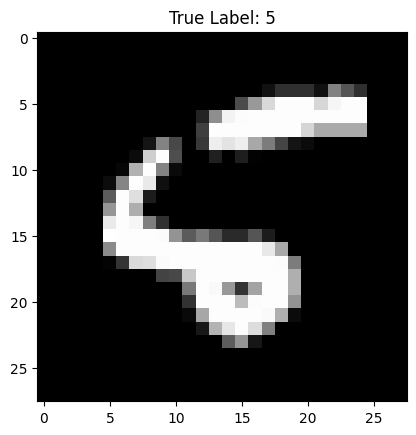

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Label: 5
Actual Label: 5
Predicted Probabilities: [[1.4632608e-11 6.5221103e-13 1.4701759e-08 3.3080472e-08 3.6131521e-08
  8.8457859e-01 1.1511510e-01 2.5233368e-10 3.0590265e-04 3.8915420e-07]]


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# --- Improved section for targeting label 5 ---
# Find a test sample with actual label 5
target_label = 5
sample_indices = np.where(np.argmax(y_test, axis=1) == target_label)[0]
sample_idx = sample_indices[0]

sample = x_test[sample_idx].reshape(1, 28, 28)

# Visualize
plt.imshow(x_test[sample_idx], cmap="gray")
plt.title(f"True Label: {target_label}")
plt.show()

# Predict
prediction = model.predict(sample)
predicted_label = tf.argmax(prediction, axis=1).numpy()[0]
actual_label = tf.argmax(y_test[sample_idx]).numpy()

print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {actual_label}")
print(f"Predicted Probabilities: {prediction}")